In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.feature_extraction import text
import re
import numpy as np

In [6]:
# =============================
# 2. Load dataset
# =============================
import pandas as pd  # Make sure pandas is imported
import kagglehub # Download latest version
import os

# Use kagglehub to download the dataset
path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")
print("Path to dataset files:", path)

# List files in the downloaded directory to find the correct filename
print("Files in the downloaded directory:", os.listdir(path))

# Construct the full path to the CSV file (replace with the correct filename)
file_path = os.path.join(path, "Reviews.csv") # Assuming this is the correct filename

# Load the dataset from the downloaded path
df = pd.read_csv(file_path)

print("Columns found:", df.columns.tolist())
print(df.head())

# Check the actual column names in your dataset and use those
# Instead of assuming column names, use the actual ones from df.columns.tolist()
text_col = 'Text'  # Replace with actual text column name from your dataset
label_col = 'Score'  # Replace with actual label column name from your dataset

# Alternatively, you can manually set the column names after inspecting df.columns.tolist()
# For example:
# text_col = 'product_review'  # Adjust based on what you see in df.columns.tolist()
# label_col = 'sentiment'      # Adjust based on what you see in df.columns.tolist()

X = df[text_col]
y = df[label_col]

Using Colab cache for faster access to the 'amazon-product-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-product-reviews
Files in the downloaded directory: ['Reviews.csv']
Columns found: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1            

In [7]:
# =============================
# 3. Preprocess text
# =============================
stop_words = text.ENGLISH_STOP_WORDS
def clean_text(txt):
    txt = str(txt).lower()
    txt = re.sub(r"http\S+|www\S+|https\S+", '', txt)
    txt = re.sub(r'[^a-z\s]', '', txt)
    return " ".join([w for w in txt.split() if w not in stop_words])

X_clean = X.apply(clean_text)

In [8]:
# =============================
# 4. Train-test split
# =============================
# Remove stratify parameter since some classes have too few samples
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
# =============================
# 5. TF-IDF Vectorization
# =============================
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
# =============================
# 6. Train Model
# =============================
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# =============================
# 7. Evaluation
# =============================
y_pred = model.predict(X_test_vec)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Macro F1 score:", round(f1_score(y_test, y_pred, average='macro'),3))


Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.67      0.65     10326
           2       0.45      0.21      0.29      5855
           3       0.45      0.27      0.34      8485
           4       0.50      0.22      0.31     16123
           5       0.79      0.95      0.86     72902

    accuracy                           0.73    113691
   macro avg       0.56      0.46      0.49    113691
weighted avg       0.69      0.73      0.70    113691

Macro F1 score: 0.489


   Class  Accuracy
0      1  0.666473
1      2  0.209564
2      3  0.271302
3      4  0.221485
4      5  0.950385


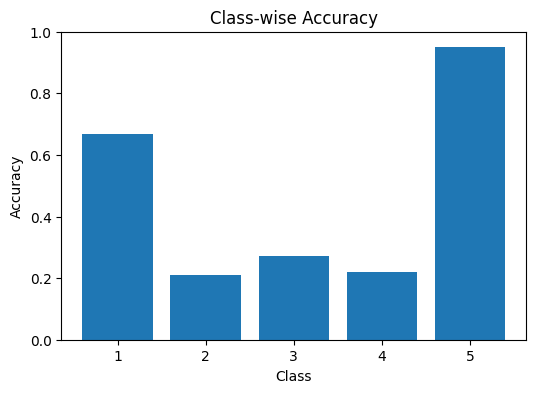

In [12]:

# =============================
# 8. Bar chart of class-wise accuracy
# =============================
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
class_acc = cm.diagonal()/cm.sum(axis=1)

import pandas as pd
acc_df = pd.DataFrame({'Class': model.classes_, 'Accuracy': class_acc})
print(acc_df)

plt.figure(figsize=(6,4))
plt.bar(acc_df['Class'], acc_df['Accuracy'])
plt.title('Class-wise Accuracy')
plt.ylim(0,1)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()